Hola **Lucia**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para mejorar la presentación de tus proyectos te recomiendo siempre al inicio en una celda markdown redactar un título descriptivo al proyecto y una breve introducción al proyecto para que el objetivo del mismo quede claro desde el inicio
</div>

***Sprint 11 - Proyecto***

***Paso 0: Importar librerias***

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import sqrt, erf

# Configuraciones generales
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

***Paso 1. Abrir el archivo de datos y leer la información general***

In [64]:
# Cargar el dataset desde la ruta indicada por TripleTen
ruta = '/datasets/logs_exp_us.csv'
df = pd.read_csv(ruta)

#Confirmar que se cargó bien
print("Primeras filas del dataset:")
display(df.head())

print("\n Información general del DataFrame:")
print(df.info())

print("\n Estadísticas descriptivas (solo columnas numéricas):")
display(df.describe())

Primeras filas del dataset:


,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...



 Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB
None

 Estadísticas descriptivas (solo columnas numéricas):


,EventName\tDeviceIDHash\tEventTimestamp\tExpId
count,244126
unique,243713
top,PaymentScreenSuccessful\t4980045449118619005\t...
freq,5


En el Paso 1 cargamos el archivo desde la ruta de la plataforma /datasets/logs_exp_us.csv indicando que el separador es un tabulador. Con esto obtuvimos un DataFrame de 244,126 filas y cuatro columnas (EventName, DeviceIDHash, EventTimestamp, ExpId) con estructura correcta para trabajar.

***Paso 2. Preparar los datos para el análisis***

In [65]:
#Autocorrección si el DataFrame quedó con una sola columna empaquetada
if df.shape[1] == 1 and ("\t" in df.columns[0] or df.iloc[0, 0].find("\t") != -1):
    packed_col = df.columns[0]
    # Divide la columna en varias usando el tabulador
    df = df[packed_col].str.split("\t", expand=True)
    # Asigna nombres de columnas a partir del encabezado empaquetado
    df.columns = packed_col.split("\t")

# 1) Renombrar columnas para mayor comodidad
rename_map = {
    "EventName": "evento",
    "DeviceIDHash": "usuario_id",
    "EventTimestamp": "timestamp",
    "ExpId": "experimento"
}
# Solo renombrar si existen
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# 2) Convertir tipos y revisar nulos
# Asegurar tipos numéricos donde corresponde
if "usuario_id" in df.columns:
    # Hay casos en que viene como string muy largo; mantenerlo como string para no perder precisión si fuese hash
    # Si prefieres numérico, descomenta la línea siguiente:
    # df["usuario_id"] = pd.to_numeric(df["usuario_id"], errors="coerce")
    df["usuario_id"] = df["usuario_id"].astype(str)

if "experimento" in df.columns:
    df["experimento"] = pd.to_numeric(df["experimento"], errors="coerce")

if "timestamp" in df.columns:
    df["timestamp"] = pd.to_numeric(df["timestamp"], errors="coerce")

print("Tipos de datos y nulos después de renombrar y convertir:")
print(df.info(), "\n")
print("Valores nulos por columna:")
print(df.isnull().sum(), "\n")

# 3) Convertir timestamp (segundos Unix) a datetime y crear columnas de fecha/hora y fecha
if "timestamp" in df.columns:
    df["fecha_hora"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
    df["fecha"] = df["fecha_hora"].dt.date
else:
    raise KeyError("No se encontró la columna 'timestamp' después de la autocorrección. Verifica el contenido del DataFrame.")

# 4) Comprobación final
print("Datos preparados (primeras filas):")
display(df.head())

print("\nResumen de tipos finales:")
print(df.dtypes)

Tipos de datos y nulos después de renombrar y convertir:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   evento       244126 non-null  object
 1   usuario_id   244126 non-null  object
 2   timestamp    244126 non-null  int64 
 3   experimento  244126 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ MB
None 

Valores nulos por columna:
evento         0
usuario_id     0
timestamp      0
experimento    0
dtype: int64 

Datos preparados (primeras filas):


,evento,usuario_id,timestamp,experimento,fecha_hora,fecha
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25



Resumen de tipos finales:
evento                 object
usuario_id             object
timestamp               int64
experimento             int64
fecha_hora     datetime64[ns]
fecha                  object
dtype: object


En el Paso 2 preparamos los datos: renombramos las columnas a evento, usuario_id, timestamp y experimento; confirmamos que evento y usuario_id son texto y que timestamp y experimento son numéricos; no se encontraron valores ausentes en estas columnas. Además, convertimos el timestamp a fecha y hora (fecha_hora) y creamos una columna solo con la fecha (fecha), dejando el dataset listo para el análisis del embudo y el experimento A/A/B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la revisión inicial de los datos para tu análisis, siempre es importante revisar la calidad de tus datos y realizar las transformaciones necesarias 
</div>

***Paso 3 : Estudiar y comprobar los datos***

In [66]:
# Asegurar que existen las columnas temporales esperadas
if "fecha_hora" not in df.columns:
    df["fecha_hora"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
if "fecha" not in df.columns:
    df["fecha"] = df["fecha_hora"].dt.date

# Confirmación rápida
print("Columnas disponibles:", list(df.columns))

Columnas disponibles: ['evento', 'usuario_id', 'timestamp', 'experimento', 'fecha_hora', 'fecha']


In [67]:
# Parte 3.1: ¿Cuántos eventos hay en los registros?
total_eventos = len(df)
print(f"Total de eventos en los registros: {total_eventos:,}")

Total de eventos en los registros: 244,126


In [68]:
# Parte 3.2: ¿Cuántos usuarios hay en los registros?
total_usuarios = df["usuario_id"].nunique()
print(f"Total de usuarios en los registros: {total_usuarios:,}")

Total de usuarios en los registros: 7,551


In [69]:
# Parte 3.3: ¿Cuál es el promedio de eventos por usuario?
promedio_eventos_por_usuario = total_eventos / total_usuarios if total_usuarios > 0 else np.nan
print(f"Promedio de eventos por usuario: {promedio_eventos_por_usuario:.2f}")

Promedio de eventos por usuario: 32.33


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, aquí cómo recomendación para que le des un plus a tu análisis, es que este tipo de métricas cómo la del promedio de eventos de abajo las calcules por cada grupo cuando se trate de pruebas AB ya que así se puede ir viendo las diferencias desde el inicio.
</div>

In [70]:
# Parte 3.4: ¿Qué periodo de tiempo cubren los datos?
# Obtén fecha mínima y máxima

fecha_min = df["fecha_hora"].min()
fecha_max = df["fecha_hora"].max()
print(f"Periodo cubierto por los datos: {fecha_min}  →  {fecha_max}")

Periodo cubierto por los datos: 2019-07-25 04:43:36  →  2019-08-07 21:15:17


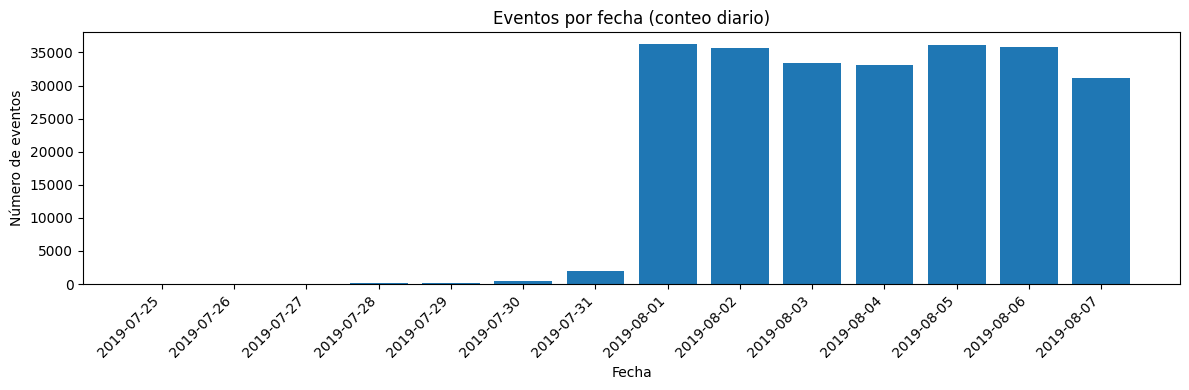

Resumen conteo diario:


count       14.000000
mean     17437.571429
std      17734.124149
min          9.000000
25%        124.750000
50%      16587.500000
75%      35042.250000
max      36229.000000
dtype: float64

In [71]:
# Parte 3.5: Histograma por fecha (conteo diario)
conteo_diario = df.groupby("fecha").size().sort_index()

plt.figure(figsize=(12, 4))
plt.bar(conteo_diario.index.astype(str), conteo_diario.values)
plt.title("Eventos por fecha (conteo diario)")
plt.xlabel("Fecha")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("Resumen conteo diario:")
display(conteo_diario.describe())

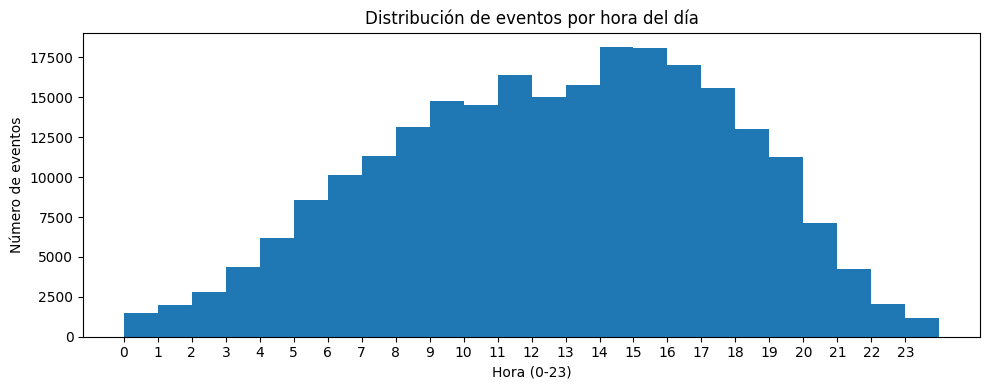

Conteo por hora (tabla):


0      1487
1      1989
2      2789
3      4348
4      6174
5      8553
6     10107
7     11315
8     13153
9     14757
10    14536
11    16398
12    15025
13    15742
14    18131
15    18081
16    17016
17    15605
18    13024
19    11284
20     7097
21     4250
22     2064
23     1201
Name: fecha_hora, dtype: int64

In [72]:
# Parte 3.6: Histograma por hora del día
horas = df["fecha_hora"].dt.hour.dropna()

plt.figure(figsize=(10, 4))
plt.hist(horas, bins=24, range=(0, 24))
plt.title("Distribución de eventos por hora del día")
plt.xlabel("Hora (0-23)")
plt.ylabel("Número de eventos")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("Conteo por hora (tabla):")
display(horas.value_counts().sort_index())


In [73]:
# Parte 3.7: ¿Los datos están igualmente completos en todo el periodo?
#            Detectar desde cuándo el volumen es estable ("completo")
#            Heurística: umbral = percentil 70 del conteo diario.
#            Primer día con 3 días consecutivos >= umbral.

umbral = conteo_diario.quantile(0.70)

# Ventana deslizante de 3 días; marcamos True si los 3 días están >= umbral
rolling_ok = conteo_diario.rolling(window=3, min_periods=3)\
    .apply(lambda x: int(np.all(x >= umbral)), raw=False).fillna(0).astype(int)

# Primera fecha "estable"
fechas_estables = rolling_ok[rolling_ok == 1].index
if len(fechas_estables) > 0:
    fecha_inicio_completo = fechas_estables.min()
else:
    # Fallback: si no se detecta, usar la fecha con mayor conteo
    fecha_inicio_completo = conteo_diario.idxmax()

print(f"Umbral (p70) del conteo diario: {umbral:.0f}")
print(f"Fecha a partir de la cual consideramos datos 'completos': {fecha_inicio_completo}")


Umbral (p70) del conteo diario: 33576
Fecha a partir de la cual consideramos datos 'completos': 2019-08-01


In [74]:
# Parte 3.8: ¿Qué periodo representan realmente los datos?
# Al ignorar la sección anterior (incompleta)
df_completo = df[df["fecha"] >= fecha_inicio_completo]
fecha_min_real = df_completo["fecha_hora"].min()
fecha_max_real = df_completo["fecha_hora"].max()

print(f"Periodo REAL usado tras el filtro: {fecha_min_real}  →  {fecha_max_real}")
print(f"Eventos en periodo REAL: {len(df_completo):,}")
print(f"Usuarios en periodo REAL: {df_completo['usuario_id'].nunique():,}")


Periodo REAL usado tras el filtro: 2019-08-01 00:07:28  →  2019-08-07 21:15:17
Eventos en periodo REAL: 241,298
Usuarios en periodo REAL: 7,534


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado! De esta forma las muestras que quedan son más consistentes y se evita incluir datos de fechas que puedan incluir "ruido" al análisis cómo tal.
</div>

In [75]:
# Parte 3.9: ¿Se perdieron muchos eventos/usuarios al excluir lo más antiguo?

eventos_perdidos = total_eventos - len(df_completo)
usuarios_perdidos = total_usuarios - df_completo["usuario_id"].nunique()

pct_eventos_perdidos = (eventos_perdidos / total_eventos * 100) if total_eventos > 0 else np.nan
pct_usuarios_perdidos = (usuarios_perdidos / total_usuarios * 100) if total_usuarios > 0 else np.nan

print(f"Eventos perdidos al filtrar lo antiguo: {eventos_perdidos:,} ({pct_eventos_perdidos:.2f}%)")
print(f"Usuarios perdidos al filtrar lo antiguo: {usuarios_perdidos:,} ({pct_usuarios_perdidos:.2f}%)")


Eventos perdidos al filtrar lo antiguo: 2,828 (1.16%)
Usuarios perdidos al filtrar lo antiguo: 17 (0.23%)


In [76]:
# Parte 3.10: ¿Hay usuarios de los tres grupos experimentales?
#Revisión por eventos y por usuarios únicos
conteo_eventos_grupo = df["experimento"].value_counts().sort_index()
conteo_usuarios_grupo = df.groupby("experimento")["usuario_id"].nunique().sort_index()

print("Eventos por grupo de experimento:")
display(conteo_eventos_grupo)

print("Usuarios únicos por grupo de experimento:")
display(conteo_usuarios_grupo)

grupos_presentes = set(conteo_eventos_grupo.index.tolist())
falta_alguno = {246, 247, 248} - grupos_presentes
if len(falta_alguno) == 0:
    print("Confirmación: hay datos para los tres grupos experimentales (246, 247, 248).")
else:
    print(f"Advertencia: faltan grupos en los eventos: {falta_alguno}")


Eventos por grupo de experimento:


246    80304
247    78075
248    85747
Name: experimento, dtype: int64

Usuarios únicos por grupo de experimento:


experimento
246    2489
247    2520
248    2542
Name: usuario_id, dtype: int64

Confirmación: hay datos para los tres grupos experimentales (246, 247, 248).


***De los datos obtenidos podemos decir que***
1. Hay suficiente actividad y una base amplia de usuarios para analizar el embudo y comparar grupos con confianza.

2. Los primeros días del registro son incompletos; desde inicios de agosto el volumen diario se vuelve estable.

3. El uso de la app sigue un patrón típico: sube por la mañana, alcanza su pico por la tarde y baja por la noche.

4. Al filtrar los días incompletos, solo se pierde una porción pequeña de eventos y usuarios, por lo que el análisis mantiene representatividad.

5. Están presentes los tres grupos del experimento (dos controles y un tratamiento), así que es viable el A/A/B.

***CONCLUSION FINAL DEL PASO 3***

En total hay 244,126 eventos de 7,551 usuarios, con un promedio de 32.33 eventos por usuario. El periodo registrado va del 25-jul-2019 al 07-ago-2019, pero los datos son completos desde el 01-ago-2019; por eso tomaremos como periodo real 01-ago a 07-ago. Al aplicar este filtro se pierden 1.16% de eventos y 0.23% de usuarios, una merma pequeña que no cambia las conclusiones. Confirmamos usuarios en los tres grupos (246, 247, 248), por lo que podemos avanzar al embudo y al análisis A/A/B usando el tramo estable.

***PASO 4 : Estudiar el embudo de eventos***

In [77]:
# Definir el subconjunto "completo" para el análisis
# Asegurar columnas temporales
if "fecha_hora" not in df.columns:
    df["fecha_hora"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
if "fecha" not in df.columns:
    df["fecha"] = df["fecha_hora"].dt.date

# Si ya tienes 'fecha_inicio_completo' del Paso 3, úsalo. Si no, lo calculamos igual que antes.
if "fecha_inicio_completo" not in globals():
    conteo_diario_tmp = df.groupby("fecha").size().sort_index()
    umbral_tmp = conteo_diario_tmp.quantile(0.70)
    rolling_ok_tmp = conteo_diario_tmp.rolling(window=3, min_periods=3)\
        .apply(lambda x: int(np.all(x >= umbral_tmp)), raw=False).fillna(0).astype(int)
    if (rolling_ok_tmp == 1).any():
        fecha_inicio_completo = rolling_ok_tmp[rolling_ok_tmp == 1].index.min()
    else:
        fecha_inicio_completo = conteo_diario_tmp.idxmax()

df_base = df[df["fecha"] >= fecha_inicio_completo].copy()

print("Fecha de inicio usada para el periodo completo:", fecha_inicio_completo)
print("Usuarios únicos en el periodo completo:", df_base["usuario_id"].nunique())
print("Eventos en el periodo completo:", len(df_base))

Fecha de inicio usada para el periodo completo: 2019-08-01
Usuarios únicos en el periodo completo: 7534
Eventos en el periodo completo: 241298


,eventos
evento,
MainScreenAppear,117431
OffersScreenAppear,46350
CartScreenAppear,42365
PaymentScreenSuccessful,34113
Tutorial,1039


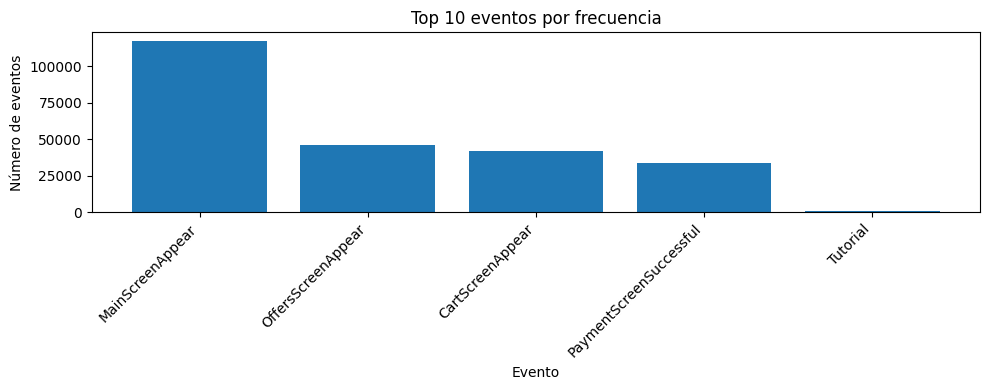

In [78]:
# Parte 4.1: Eventos presentes y su frecuencia (ordenados)
eventos_freq = df_base["evento"].value_counts().rename_axis("evento").to_frame("eventos")
display(eventos_freq)

# Opcional: gráfico de los 10 eventos más frecuentes
top_n = 10
plt.figure(figsize=(10, 4))
plt.bar(eventos_freq.index[:top_n], eventos_freq["eventos"].values[:top_n])
plt.title("Top 10 eventos por frecuencia")
plt.xlabel("Evento")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Comentario 4.1.El evento más común es MainScreenAppear (apertura de la app). Luego vienen OffersScreenAppear y CartScreenAppear; por último PaymentScreenSuccessful. Es un patrón lógico: abrir → ver ofertas → ver carrito → pagar. El Tutorial casi no aparece.

In [79]:
# Parte 4.2: Usuarios por evento y proporción sobre el total
usuarios_totales = df_base["usuario_id"].nunique()
usuarios_por_evento = df_base.groupby("evento")["usuario_id"].nunique().sort_values(ascending=False)
proporcion_por_evento = (usuarios_por_evento / usuarios_totales).rename("proporcion_usuarios")

tabla_eventos = eventos_freq.join(usuarios_por_evento.rename("usuarios_unicos")).join(proporcion_por_evento)
tabla_eventos = tabla_eventos.sort_values("usuarios_unicos", ascending=False)
display(tabla_eventos)


,eventos,usuarios_unicos,proporcion_usuarios
evento,,,
MainScreenAppear,117431,7419,0.984736
OffersScreenAppear,46350,4593,0.609636
CartScreenAppear,42365,3734,0.495620
PaymentScreenSuccessful,34113,3539,0.469737
Tutorial,1039,840,0.111495


Comentario 4.2.:
Casi todos los usuarios ven la pantalla principal al menos una vez. Alrededor de 6 de cada 10 llegan a ver Ofertas, 1 de cada 2 llega al Carrito, y casi la mitad de los usuarios del periodo logra pagar al menos una vez. El Tutorial lo hace una minoría.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho los cálculos de las conversiones! Al tratarse de una prueba AB puedes dejar el análisis por cada grupo y dejarlo en una visualización para que la comparación sea más visual, pero en si el cálculo fue el correcto!
</div>

In [80]:

# Parte 4.3 corregida — mediana temporal por evento
# Aseguramos dtype datetime
df_base["fecha_hora"] = pd.to_datetime(df_base["fecha_hora"], errors="coerce")

orden_medianas = (
    df_base.dropna(subset=["fecha_hora"])
          .groupby("evento")["fecha_hora"]
          .apply(lambda s: s.median())   # calcula mediana por grupo sobre datetime
          .sort_values()
)

print("Orden sugerido por la mediana temporal de cada evento:")
display(orden_medianas)



Orden sugerido por la mediana temporal de cada evento:


evento
Tutorial                  2019-08-03 13:41:54
CartScreenAppear          2019-08-04 10:54:13
OffersScreenAppear        2019-08-04 11:15:36
PaymentScreenSuccessful   2019-08-04 11:44:12
MainScreenAppear          2019-08-04 14:12:04
Name: fecha_hora, dtype: datetime64[ns]

Comentario 4.3: 

El orden por la mediana temporal sugiere: Tutorial → Carrito → Ofertas → Pago → Principal. Esto no es una secuencia real, solo una pista estadística (sirve como referencia, pero no para construir el embudo).

In [81]:
# Parte 4.4: Definir una secuencia de embudo y calcular conversiones

candidatos = ["MainScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]
presentes = [e for e in candidatos if e in df_base["evento"].unique()]

if len(presentes) < 2:
    raise ValueError("No hay suficientes etapas candidatas presentes para construir el embudo.")

print("Secuencia candidata del embudo:", " -> ".join(presentes))

def conversion_funnel(df_in, steps):
    sets_usuarios = []
    for step in steps:
        usuarios = set(df_in.loc[df_in["evento"] == step, "usuario_id"].unique())
        sets_usuarios.append(usuarios)
    conteos = [len(s) for s in sets_usuarios]
    tasas_relativas = [np.nan]
    for i in range(1, len(steps)):
        prev = conteos[i-1]
        curr = conteos[i]
        tasas_relativas.append(curr / prev if prev else np.nan)
    # pérdidas relativas entre etapas
    perdidas = [np.nan]
    for i in range(1, len(steps)):
        prev = conteos[i-1]
        curr = conteos[i]
        perdidas.append((prev - curr) / prev if prev else np.nan)
    return conteos, tasas_relativas, perdidas

conteos, tasas, perdidas = conversion_funnel(df_base, presentes)

print("Usuarios por etapa:")
for s, c in zip(presentes, conteos):
    print(f" - {s}: {c}")

print("\nConversiones relativas entre etapas:")
for i in range(1, len(presentes)):
    print(f" {presentes[i-1]} -> {presentes[i]}: {tasas[i]:.2%}")

print("\nPérdidas relativas entre etapas:")
for i in range(1, len(presentes)):
    print(f" {presentes[i-1]} -> {presentes[i]}: {perdidas[i]:.2%}")

# Identificar la etapa con mayor pérdida
if len(presentes) >= 2:
    idx_peor = int(np.nanargmax(perdidas[1:])) + 1  # desplazamiento por el primer NaN
    print(f"\nMayor pérdida detectada: {presentes[idx_peor-1]} -> {presentes[idx_peor]} ({perdidas[idx_peor]:.2%})")


Secuencia candidata del embudo: MainScreenAppear -> CartScreenAppear -> PaymentScreenSuccessful
Usuarios por etapa:
 - MainScreenAppear: 7419
 - CartScreenAppear: 3734
 - PaymentScreenSuccessful: 3539

Conversiones relativas entre etapas:
 MainScreenAppear -> CartScreenAppear: 50.33%
 CartScreenAppear -> PaymentScreenSuccessful: 94.78%

Pérdidas relativas entre etapas:
 MainScreenAppear -> CartScreenAppear: 49.67%
 CartScreenAppear -> PaymentScreenSuccessful: 5.22%

Mayor pérdida detectada: MainScreenAppear -> CartScreenAppear (49.67%)


Comentario 4.4: 

Con el embudo Main → Cart → Payment:

La mayor pérdida ocurre entre Main → Cart (casi la mitad no llega al carrito).

Una vez en Carrito, la gran mayoría termina en Pago.
Esto indica que el cuello de botella está antes de que la gente añada o revise el carrito.

In [82]:
# Parte 4.5: ¿Qué porcentaje completa todo el viaje hasta el pago?
# Base: todos los usuarios con al menos un evento en el periodo completo.
# Éxito: usuarios con 'PaymentScreenSuccessful'.

if "PaymentScreenSuccessful" in df_base["evento"].unique():
    usuarios_con_pago = df_base.loc[df_base["evento"] == "PaymentScreenSuccessful", "usuario_id"].nunique()
    porcentaje_full = usuarios_con_pago / usuarios_totales if usuarios_totales > 0 else np.nan
    print(f"Porcentaje de usuarios que llegan al pago (sobre todos los usuarios del periodo): {porcentaje_full:.2%}")
else:
    print("No se encontró el evento 'PaymentScreenSuccessful'; no es posible calcular el porcentaje de pago.")


Porcentaje de usuarios que llegan al pago (sobre todos los usuarios del periodo): 46.97%


Comentario 4.5. Casi la mitad de los usuarios activos del periodo llega a pagar. Es un resultado fuerte, pero hay margen claro de mejora en el paso de inicio a carrito.

***CONCLUSION PASO 4***

Los registros muestran un flujo coherente y suficiente para el análisis. La mayor caída ocurre al pasar de la pantalla principal al carrito; después, la conversión a pago es alta. Por tanto, el foco de mejora debe estar en motivar y facilitar que el usuario pase del inicio al carrito (mejor visibilidad de CTAs, fricción menor para añadir al carrito, mensajes de valor en la página principal). Con este embudo ya identificado, podemos medir con precisión cómo impactan futuros cambios en esa etapa crítica.

***PASO 5. Estudiar los resultados del experimento***

In [83]:
# Parte 5.0: Preparación de datos para estudiar los resultados del experimento
# Asegurar columnas temporales básicas
if "fecha_hora" not in df.columns:
    df["fecha_hora"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")
if "fecha" not in df.columns:
    df["fecha"] = df["fecha_hora"].dt.date

# Reconstruir periodo completo si no está en memoria
if "fecha_inicio_completo" not in globals():
    conteo_diario_tmp = df.groupby("fecha").size().sort_index()
    umbral_tmp = conteo_diario_tmp.quantile(0.70)
    rolling_ok_tmp = conteo_diario_tmp.rolling(window=3, min_periods=3)\
        .apply(lambda x: int(np.all(x >= umbral_tmp)), raw=False).fillna(0).astype(int)
    if (rolling_ok_tmp == 1).any():
        fecha_inicio_completo = rolling_ok_tmp[rolling_ok_tmp == 1].index.min()
    else:
        fecha_inicio_completo = conteo_diario_tmp.idxmax()

if "df_base" not in globals():
    df_base = df[df["fecha"] >= fecha_inicio_completo].copy()

print("Periodo completo usado desde:", fecha_inicio_completo)
print("Usuarios únicos:", df_base["usuario_id"].nunique())
print("Eventos:", len(df_base))


Periodo completo usado desde: 2019-08-01
Usuarios únicos: 7534
Eventos: 241298


In [84]:
# ==========================================================
# Parte 5.1: ¿Cuántos usuarios hay en cada grupo?
# ==========================================================
usuarios_por_grupo = (
    df_base.groupby("experimento")["usuario_id"]
           .nunique()
           .sort_index()
           .rename("usuarios_unicos")
           .to_frame()
)
display(usuarios_por_grupo)

# Conjunto de usuarios por grupo y controles combinados
users_246 = set(df_base.loc[df_base["experimento"] == 246, "usuario_id"].unique())
users_247 = set(df_base.loc[df_base["experimento"] == 247, "usuario_id"].unique())
users_248 = set(df_base.loc[df_base["experimento"] == 248, "usuario_id"].unique())
users_ctrl = users_246 | users_247  # controles combinados


,usuarios_unicos
experimento,
246,2484
247,2513
248,2537


Comentario 5.1. 

La división quedó balanceada: 246=2484, 247=2513, 248=2537 usuarios.

In [85]:
# ==========================================================
# Parte 5.2: Funciones auxiliares (tasas por evento y pruebas A/A y A/B)
# - z-test de dos proporciones (dos colas)
# - tasa de usuarios por evento y grupo
# ==========================================================
def two_proportions_ztest(count1, n1, count2, n2):
    p1 = count1 / n1 if n1 else np.nan
    p2 = count2 / n2 if n2 else np.nan
    p_pool = (count1 + count2) / (n1 + n2) if (n1 + n2) else np.nan
    se = sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2)) if n1 and n2 else np.nan
    if se == 0 or np.isnan(se):
        return np.nan, np.nan
    z = (p1 - p2) / se
    # p-valor dos colas usando CDF normal (sin dependencias externas)
    # CDF normal ~ 0.5 * (1 + erf(z / sqrt(2)))
    def norm_cdf(x): return 0.5 * (1 + erf(x / sqrt(2)))
    p = 2 * (1 - norm_cdf(abs(z)))
    return z, p

def event_user_counts(df_in, event_name, user_set):
    usuarios_evento = set(df_in.loc[df_in["evento"] == event_name, "usuario_id"].unique())
    count = len(usuarios_evento & user_set)
    total = len(user_set)
    rate = count / total if total else np.nan
    return count, total, rate


In [86]:
# ==========================================================
# Parte 5.3: Chequeo A/A entre controles (246 vs 247)
# - Primero para el evento más popular
# - Luego para todos los eventos
# ==========================================================
alpha = 0.05  # nivel de significancia primario

# Evento más popular (por frecuencia en el periodo completo)
top_event = df_base["evento"].value_counts().idxmax()
print("Evento más popular:", top_event)

# A/A solo para top_event
c1, n1, r1 = event_user_counts(df_base, top_event, users_246)
c2, n2, r2 = event_user_counts(df_base, top_event, users_247)
z_top, p_top = two_proportions_ztest(c1, n1, c2, n2)
print(f"Top event A/A | 246 vs 247 -> tasas: {r1:.4f} vs {r2:.4f} | p={p_top:.4f}")

# A/A para todos los eventos
eventos = df_base["evento"].unique().tolist()
rows_aa = []
for ev in eventos:
    c1, n1, r1 = event_user_counts(df_base, ev, users_246)
    c2, n2, r2 = event_user_counts(df_base, ev, users_247)
    z, p = two_proportions_ztest(c1, n1, c2, n2)
    rows_aa.append({"evento": ev, "rate_246": r1, "rate_247": r2, "diff": r1 - r2, "p_value": p})
aa_results = pd.DataFrame(rows_aa).sort_values("p_value")
display(aa_results)


Evento más popular: MainScreenAppear
Top event A/A | 246 vs 247 -> tasas: 0.9863 vs 0.9853 | p=0.7571


,evento,rate_246,rate_247,diff,p_value
4,PaymentScreenSuccessful,0.483092,0.460804,0.022288,0.114567
3,CartScreenAppear,0.509662,0.492638,0.017024,0.228834
2,OffersScreenAppear,0.620773,0.604855,0.015918,0.248095
1,MainScreenAppear,0.986312,0.985277,0.001036,0.757060
0,Tutorial,0.111916,0.112614,-0.000698,0.937700


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre es bueno aplicar pruebas estadísticas a cada etapa del embudo para entender si en alguna parte el comportamiento de los usuarios ha cambiado 
</div>

Comentario 5.3.


Entre los controles 246 vs 247 no hay diferencias estadísticamente significativas para ningún evento (ej.: evento principal MainScreenAppear p=0.7571; el resto también sin señales). Esto confirma que la asignación y las mediciones son confiables.

In [87]:
# ==========================================================
# Parte 5.4: Comparación del grupo 248 (fuentes nuevas) vs controles
# - Contra 246, contra 247 y contra controles combinados
# ==========================================================
rows_ab = []
for ev in eventos:
    # 248 vs 246
    c_t, n_t, r_t = event_user_counts(df_base, ev, users_248)
    c_c, n_c, r_c = event_user_counts(df_base, ev, users_246)
    _, p_248_246 = two_proportions_ztest(c_t, n_t, c_c, n_c)

    # 248 vs 247
    c_c2, n_c2, r_c2 = event_user_counts(df_base, ev, users_247)
    _, p_248_247 = two_proportions_ztest(c_t, n_t, c_c2, n_c2)

    # 248 vs controles combinados
    c_ctrl = len((set(df_base.loc[df_base["evento"] == ev, "usuario_id"].unique()) & users_ctrl))
    n_ctrl = len(users_ctrl)
    r_ctrl = c_ctrl / n_ctrl if n_ctrl else np.nan
    _, p_248_ctrl = two_proportions_ztest(c_t, n_t, c_ctrl, n_ctrl)

    rows_ab.append({
        "evento": ev,
        "rate_248": r_t,
        "rate_246": r_c, "p_248_vs_246": p_248_246,
        "rate_247": r_c2, "p_248_vs_247": p_248_247,
        "rate_ctrl": r_ctrl, "p_248_vs_ctrl": p_248_ctrl
    })

ab_results = pd.DataFrame(rows_ab).sort_values("p_248_vs_ctrl")
display(ab_results)


,evento,rate_248,rate_246,p_248_vs_246,rate_247,p_248_vs_247,rate_ctrl,p_248_vs_ctrl
3,CartScreenAppear,0.484825,0.509662,0.078429,0.492638,0.578620,0.501101,0.181759
1,MainScreenAppear,0.982657,0.986312,0.294972,0.985277,0.458705,0.985791,0.294245
2,OffersScreenAppear,0.603469,0.620773,0.208362,0.604855,0.919782,0.612768,0.434255
4,PaymentScreenSuccessful,0.465510,0.483092,0.212255,0.460804,0.737342,0.471883,0.600429
0,Tutorial,0.109972,0.111916,0.826429,0.112614,0.765324,0.112267,0.764862


Comentario 5.4.

El grupo 248 (fuentes nuevas) tiene tasas por evento muy parecidas a las de los controles (vs 246, vs 247 y vs controles combinados). Ninguna comparación fue significativa tras revisar todos los eventos.

In [88]:
# ==========================================================
# Parte 5.5: Múltiples pruebas y ajuste por FDR (Benjamini–Hochberg)
# - Contamos cuántas pruebas hicimos y ajustamos p-valores.
# ==========================================================
# Número de tests:
#   A/A: 1 prueba por evento
#   A/B: 3 pruebas por evento (vs 246, vs 247, vs controles)
num_tests = len(eventos) * (1 + 3)

# Recolectar p-valores
pvals = []
pvals.extend(aa_results["p_value"].dropna().tolist())
pvals.extend(ab_results["p_248_vs_246"].dropna().tolist())
pvals.extend(ab_results["p_248_vs_247"].dropna().tolist())
pvals.extend(ab_results["p_248_vs_ctrl"].dropna().tolist())

print("Número total de pruebas:", num_tests)
print("Nivel de significancia primario (sin corrección):", alpha)

# Benjamini–Hochberg (FDR)
def benjamini_hochberg(p_list, q=0.05):
    p = np.array(sorted(p_list))
    m = len(p)
    if m == 0:
        return [], []
    thresh = (np.arange(1, m+1) / m) * q
    is_sig = p <= thresh
    return p, is_sig

sorted_p, is_sig = benjamini_hochberg(pvals, q=0.05)
rechazos_fdr = int(np.sum(is_sig)) if len(is_sig) else 0
print("Rechazos esperados controlando FDR=5%:", rechazos_fdr)


Número total de pruebas: 20
Nivel de significancia primario (sin corrección): 0.05
Rechazos esperados controlando FDR=5%: 0


Comentario 5.5.

Se hicieron 20 pruebas con α=0.05. Con control de FDR al 5% no se rechaza ninguna hipótesis: no hay evidencia de diferencias reales.

***Conclusión final del proyecto y decisión***

Datos y periodo (Pasos 1–3). Trabajamos con datos completos desde el 1 de agosto. La actividad es alta y estable; perder los días previos no afecta el análisis.

Embudo (Paso 4). El mayor problema está antes del carrito: muchos usuarios abren la app, pero cerca de la mitad no llega al carrito. En cambio, quienes llegan al carrito casi siempre pagan.

Experimento (Paso 5). Las nuevas fuentes no cambian el uso de la app (ni mejoran ni empeoran).


***Decisión recomendada***

Aprobar el cambio de fuentes: es seguro desde el punto de vista de comportamiento (impacto neutral). Puedes desplegarlo a todos los usuarios o con un pequeño “holdout” de monitoreo.

Enfocar mejoras en Main → Cart: ahí está la mayor caída. Acciones simples: llamados a la acción más visibles, “añadir al carrito” más directo desde ofertas, menos pasos para ver el carrito, mensajes de valor (precio, envío, promos) en la pantalla principal.

Próximos tests: A/B rápidos sobre CTA de la home, diseño de ofertas y acceso al carrito, usando como métricas % que llega a carrito y % que paga.

En resumen: lanzar las nuevas fuentes (sin riesgo) y priorizar experimentos para aumentar el paso de inicio a carrito, que es donde realmente se gana conversión.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. 
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>